# Colab and Numpy

## 1. Softmax
If you don't remember Softmax details, you can visit here:
https://en.wikipedia.org/wiki/Softmax_function \\ \\

Write a function that computes the softmax using numpy functions. 


In [1]:
# Import necessary libraries
import numpy as np
import random

In [16]:
def Softmax(logits):
    makhraj = np.sum(np.exp(logits))
    s = np.exp(logits)/makhraj
    return s

Let's say the logits for the output layer of your neural network are the last 4 digits of your student id. Run your code above and output the softmax values. 

In [17]:
### YOUR CODE HERE ###
student_id = 98522076
logits = np.array([2,0,7,6])
soft_max_logits = Softmax(logits)
print(soft_max_logits)

[4.89843956e-03 6.62931706e-04 7.26992890e-01 2.67445738e-01]


##2. Temperature

Write a new function to calculate softmax with a Temperature parameter. \\


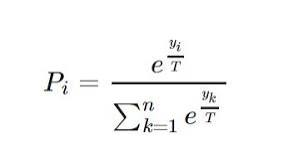

In [18]:
def Softmax(logits, T = 1):
    makhraj = np.sum(np.exp(logits/T))
    s = np.exp(logits/T)/makhraj
    return s

### Temperature Values

Provide the softmax value from the logits above for various temperatures. 

#### T = 1

In [19]:
### YOUR CODE HERE ###
soft_max_logits = Softmax(logits, 1)
print(soft_max_logits)

[4.89843956e-03 6.62931706e-04 7.26992890e-01 2.67445738e-01]


#### T = 10

In [20]:
### YOUR CODE HERE ###
soft_max_logits = Softmax(logits, 10)
print(soft_max_logits)

[0.20164231 0.16509076 0.33245196 0.30081497]


#### T = 100

In [21]:
### YOUR CODE HERE ###
soft_max_logits = Softmax(logits, 100)
print(soft_max_logits)

[0.24556265 0.24070018 0.25815292 0.25558425]


## 3. Conclusion

Explain how temperature affects logits and what it's good for?

\# YOUR EXPLANATION HERE \#

احتمال ها رو تغییر داده و اسکیل کزده مثلا در اینجا ورودی هایی که بیشترین احتمال رو داشتند رو احتمالشون رو کاهش داده و اونهایی که احتمالشون خیلی کم بوده رو بیشتر کرده و هر چی مقدار تی بیشتر بشه خروجی ها به هم نزدیک میشوند.

اصلا برای طبقه بندی که قراره فقط یک جواب داشته باشیم خوب نیشت ولی میتونه برای جاهایی که میشه چند تا جواب داشت مثلا ترنسلیشن یا کوسشن انسورینگ خوب باشه.
چون در طی آموزششون میتونیم چند تا جواب رو دنبال کنیم و درمرحله ی آخر یکی رو انتخاب کنیم.

# Hugging Face

In [22]:
import torch
torch.manual_seed(0)

In [23]:
# install transformers library
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.8 MB/s eta 0:00:00


Load GPT2-Large from https://huggingface.co/gpt2-large \\
Do not forget to load with it's LM head for generation

In [34]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

## 1. Generation

Language model heads at huggingface, provide us auto-regressive text generation their respective GenerationMixin class. \\ 

First of all, take a look at [generate](https://huggingface.co/docs/transformers/v4.18.0/en/main_classes/text_generation#transformers.generation_utils.GenerationMixin.generate) function and its arguments. 

### 1.1 Greedy decoding

By default, this function generates with greedy decoding. To get started, please resume this text with greedy strategy with **maximum sequence length of 50** \\
You can simply call model.generate(**args), all you have to do is to figure out the right arguments. 

In [38]:
text = "There is an exam on Thursday morning and"
input_ids = tokenizer.encode(text, return_tensors='pt')

In [39]:
# YOUR CODE HERE ###
# generate 5 sentences using the tokenized_prompt
greedy_output = []
for i in range(5):
    greedy_output = model.generate(
        input_ids,
        max_length=50,
        do_sample=True,
        top_p=0.9,
        num_return_sequences=1
    )

    print(f"{i + 1}) {tokenizer.batch_decode(greedy_output)[0]}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


1) There is an exam on Thursday morning and everyone should be ready for it," said Mr. Smith.

The school and some students were sent to nearby St. Mary's Church, where parents and students can pray and receive other offerings. The prayer


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


2) There is an exam on Thursday morning and the next day (Wednesday) we'll get back with you to check in. I know I've missed you in class. We'll do that tomorrow.


"The rest of the week (Friday)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


3) There is an exam on Thursday morning and we're going to meet again next month. We're going to get that done today."

The plan is to spend the week before the exam reviewing documents, taking notes and writing notes to make sure the


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


4) There is an exam on Thursday morning and you're trying to figure out the answer to that question. It may be an important question that is not yet answered."

Lambert is also taking a second chance and will now need to perform a
5) There is an exam on Thursday morning and you will have to show up in the room after 8am to be admitted to the hospital. The hospital will have to allow you to enter the hospital room at 9am and then you will be admitted to the


In [40]:
print("Output:\n" + 100 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
There is an exam on Thursday morning and you will have to show up in the room after 8am to be admitted to the hospital. The hospital will have to allow you to enter the hospital room at 9am and then you will be admitted to the


### 1.2 Beam Search
Take a look at [generate](https://huggingface.co/docs/transformers/v4.18.0/en/main_classes/text_generation#transformers.generation_utils.GenerationMixin.generate) function and add a new argument to use beam search strategy. **Beams size is 5. Limit maximum length to 50.** 

In [70]:
# YOUR CODE HERE ###
for i in range(2):
    beam_output = model.generate(
        input_ids,
        max_length=50,
        do_sample=True,
        top_p=0.9,
        num_return_sequences=1,
        top_k=5
    )

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [72]:
print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
There is an exam on Thursday morning and it will be a little bit longer," he said.

Mr Turnbull's comments come after the Australian Electoral Commission released a list of candidates who had received the most votes from the electorate in the last election,


### 1.3 STOP REPEATING!
As you can see, there are repeating ngrams! Let's make our generation a bit cleaneer. **Again, using beam size of 5, try not repeating ngrams of size 2. Limit maximum length to 50.**

In [67]:
for i in range(2):
    beam_output = model.generate(
        input_ids,
        max_length=50,
        do_sample=True,
        top_p=0.9,
        num_return_sequences=1,
        top_k=2
    )

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [69]:
print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
There is an exam on Thursday morning and I will be back in a few hours to do a little bit of homework on that."

"I'm going to be back in a couple hours," he said. "I'm going to be back


### 1.4 Conclusion

Compare these three outputs and explain how we can make it better.

######################


---


## 2. Push to hub

Push your GPT2-Large to hub. Remember you have to be a member of our organization, or else we are unable to locate your model!

In [ ]:
# YOUR CODE HERE #
from transformers import GPT2Tokenizer, GPT2LMHeadModel
tokenizer = GPT2Tokenizer.from_pretrained("gpt2-large")
model = GPT2LMHeadModel.from_pretrained("gpt2-large")
text = "I'm hungry"
encoded_input = tokenizer(text, return_tensors='pt')
output = model.generate(**encoded_input)
# TOKEN = "it should be hidden"
tokenizer.push_to_hub("Exam-Part7-GPT2-Large",  use_auth_token=TOKEN, commit_message="Upload GPT2-Large")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


CommitInfo(commit_url='https://huggingface.co/mahdieh98/Exam-Part7-GPT2-Large/commit/4f180510d610c863de98b420d9d5c2a43f9cb2dd', commit_message='Upload GPT2-Large', commit_description='', oid='4f180510d610c863de98b420d9d5c2a43f9cb2dd', pr_url=None, pr_revision=None, pr_num=None)

# Temperature at generation (extra point) 

Can you explain temperature argument in generation? How to use it? Provide us a config that model have multiple choices with nearly same probability.




In [ ]:
# do_sample = True
# temperature = 100
# top_k  = 40 # or top_p = 0.9

What happens if T &#8594; 0?

##########

---
